<a href="https://colab.research.google.com/github/Praveen916-R/Machine_Learning_Assignments.ipynb/blob/main/Linear_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regresion**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('student_scores.csv') #read the dataset

In [3]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
dataset.Hours.quantile(0.75)

7.4

In [6]:
iqr = dataset.Hours.quantile(0.75) - dataset.Hours.quantile(0.25)
upper_threshold = dataset.Hours.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = dataset.Hours.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
lower_threshold

-4.3500000000000005

Values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier



No skew in the data.

In [7]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
dataset = dataset.drop_duplicates() # code to delete duplicates
dataset.shape

(25, 2)

In [9]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

**Median and mean are closer to each other - there is less skew in the data**

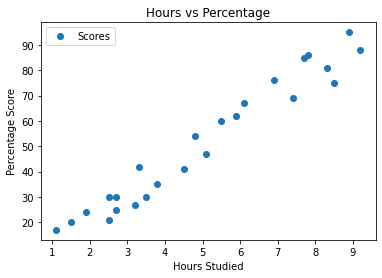

In [12]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**1) Is there any relationship between the feature and target - Yes.  2) Is there any linear relationship between the feature and target - Yes.   3) No transformation is required**





In [13]:
dataset.corr() # correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.**

In [14]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

***Preparing the data***

In [15]:
a = [1,2,3,4]
a[:-2]

[1, 2]

In [16]:
#dataset.iloc[row_criteria,column_criteria]

In [17]:
X = dataset.loc[:, ['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Scores'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 5789)

In [18]:
y_test

array([95, 21, 62, 47, 67, 54, 85])

In [19]:
X_train.shape, X_test.shape

((18, 1), (7, 1))

****Normlising/Scaling the data****

In [20]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit i

In [21]:
# from sklearn.preprocessing import MinMaxScaler
# shivaData = np.array([1.4,2.3,3.3,4,-4]).reshape(-1,1)
# scaler = MinMaxScaler()
# scaler.fit(shivaData)
# scaler.transform(shivaData)

In [22]:
# scaler.var_

In [23]:
X_test

array([[ 1.63035906],
       [-0.84417801],
       [ 0.47041981],
       [ 0.16110267],
       [ 0.54774909],
       [ 0.04510875],
       [ 1.16638336]])

**Modelling**

In [24]:
#Model for algorithm - score = (m * hours) + c

In [25]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [26]:
print(regressor.intercept_) # c

47.55555555555556


In [27]:
print(regressor.coef_) # slope - m

# predicted score  = 9.87 * (hours) + 1.56

[23.87684836]


In [28]:
regressor.predict([[7]])

array([214.69349407])

In [29]:
#regressor.predict(scaler.transform(np.array([4]).reshape(-1,1)))

In [30]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([86.4833917 , 27.39924514, 58.787698  , 51.40217968, 60.63407758,
       48.63261031, 75.40511422])

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,95,86.483392
1,21,27.399245
2,62,58.787698
3,47,51.402180
4,67,60.634078
5,54,48.632610
6,85,75.405114


In [32]:
regressor.predict([[12]]) # perils of extrapolation

array([334.07773586])

In [33]:
x = input()
x

Praveen


'Praveen'

**Metrics**

In [34]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.9156697693394952


0.9156697693394952

**Custom Loss Function**

In [35]:
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [38]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize
import numpy as np
#minimize - given a function, it will try to find the params that makes the function the lowest value


# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

# we will write our own loss function
# my model is ypred = m^2 * x + c^2
# my loss function is MSE loss funcition =>
# my loss function is np.mean((Y - np.matmul(X,np.square(beta))))
#beta stores the values of the parameters : beta[0]  will be m and beta[1] will be c
# ypred = (np.square(beta[0]) * X) + (np.square(beta[1]) * 1)
#mse = np.mean(np.square(ypred - y))

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    #X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.square(((np.square(beta[0]) * X) + (np.square(beta[1]) * 1)) - Y)) 
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([2,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 9.75 * hoursStudies
print(beta_hat)

[-4.13693295e-03  6.89605362e+00]


In [39]:
from scipy.optimize import minimize
# y = mx + c 
def objective_function(beta, X, Y):
    b = np.ones((X.shape[0],X.shape[1]+1))
    b[:,:-1] = X
    error = np.mean(np.abs(np.matmul(b,beta) - Y))
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1,1])
result = minimize(objective_function, beta_init, args=(X_train,y_train),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)

[22.84865845 48.09817701]


**Effect of Outlier**

11.304264350335071 45.87219026147348
Mean Absolute Error: 15.146725380659921
Mean Squared Error: 321.26005405423206
R2 : 0.6142912532531922


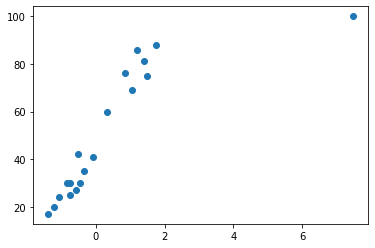

In [40]:
X_train_outlier = np.vstack([X_train,scaler.transform([[24]])])
y_train_outlier = np.append(y_train,100)

plt.scatter(X_train_outlier, y_train_outlier)



regressor = LinearRegression()
regressor.fit(X_train_outlier, y_train_outlier)
y_pred = regressor.predict(X_test)
# print(y_pred)
# print(y_test)
print(regressor.coef_[0],regressor.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 :', np.sqrt(metrics.r2_score(y_test, y_pred)))

In [41]:
#Gradient descent to find the params that minimze the loss function

from scipy.optimize import minimize

# np.matmul(X,np.square(beta)) = prediceted = x * beta
# mae = mean(abs(predicted - trueVal))
# np.square(beta)

#I am trying to find the value of m (beta) that minimises my below loss function
def objective_function(beta, X, Y): #Loss Function
    X = np.c_[X,np.ones(X.shape[0])]
    error = np.mean(np.abs(np.matmul(X,beta) - Y)) # average of absolute value of (predicted - trueLabel)
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([6,5]) # initiate the model with a random value

#code for doing gradient descent
result = minimize(objective_function, beta_init, args=(X_train_outlier,y_train_outlier),
                  method='BFGS', options={'maxiter': 500}) #syntax for doing gradient descent

# result
# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x # score = 10.6 * hoursStudies
print(beta_hat)

[20.95910761 46.07246504]


**Multiple Linear Regression**

In [42]:
import pandas as pd
dataset = pd.read_csv('petrol_consumption.csv')

In [43]:
dataset.head()
#dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [44]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [45]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [46]:
dataset = dataset.drop_duplicates()

In [47]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [48]:
iqr = dataset['Paved_Highways'].quantile(0.75) - dataset['Paved_Highways'].quantile(0.25)
upper_threshold = dataset['Paved_Highways'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Paved_Highways'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(13224.625, -2958.375)

In [62]:
dataset.Paved_Highways = dataset.Paved_Highways.clip(-2958, 13224)

In [63]:
dataset.shape

(48, 6)

**EDA**

In [65]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

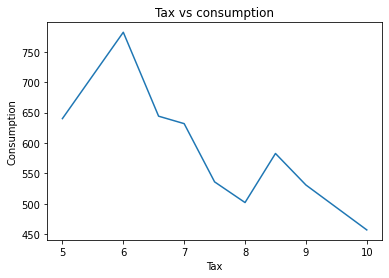

In [66]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption',style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [67]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


**1) There is a linear relationship between tax and consumption 2) As tax increases, comsumption decreases which is in-line with our GK 3) No transformation required - we can consider the feature for linear regression**

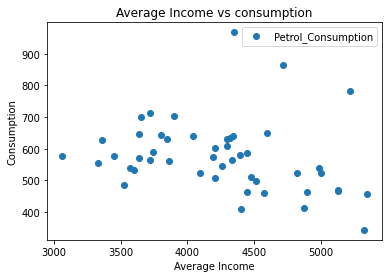

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [68]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
dataset[['Average_income','Petrol_Consumption']].corr()

**1) There is a low linear relationshp between the data 2) No transformation reqd 3) The direction of relatiohsnip is not in-line with our GK**

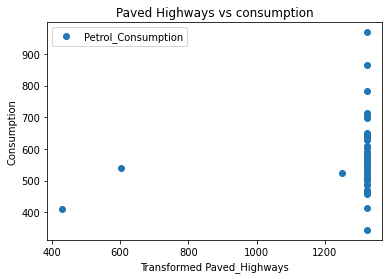

,transformed,Petrol_Consumption
transformed,1.000000,0.207868
Petrol_Consumption,0.207868,1.000000


In [69]:
import numpy as np
dataset['transformed'] = (dataset['Paved_Highways']) # transformation
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

**1) There is no linear relationship between highways and consumption 2) Have tried all trasnformations - still not able to see a good linear relationship 3) Have decided to drop the feature**

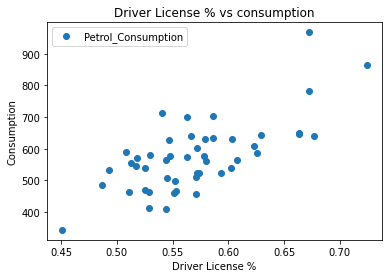

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [70]:
dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

**1) High correlation between the data 2) No transformation reqd**

In [71]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**Model training**

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [75]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -31.67 *scaled_petrol_tax + -38.80 * scaled_avg_income +  69.16* scaled_pop_driver + 576.68

,Coefficient
Petrol_tax,-17.639941
Average_income,-46.890863
Population_Driver_licence(%),89.752425


In [76]:
regressor.predict(scaler.transform(np.array([[11,5000,0.6]])))

array([500.99924778])

In [77]:
regressor.intercept_ # c 

579.236842105263

In [79]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df

,Actual,Predicted
0,648,779.182302
1,704,648.988440
2,640,741.170893
3,464,391.456271
4,534,474.735709
5,699,630.011969
6,524,569.759485
7,540,562.111323
8,577,690.164500
9,344,267.545368


In [80]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.41847522641697255


**Feature Selection**

**RFE**

In [81]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

[('Petrol_tax', True), ('Average_income', True), ('LogPaved_Highways', True)]

**Sequential Feature selection**

In [82]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.9 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [83]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

[('Petrol_tax', False), ('Average_income', True), ('LogPaved_Highways', True)]


In [84]:
list(zip([1,2,3],['a','b','c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [85]:
X_trans = sfs.transform(X)
X_trans # feature selection

array([[3.571e+03, 5.250e-01],
       [4.092e+03, 5.720e-01],
       [3.865e+03, 5.800e-01],
       [4.870e+03, 5.290e-01],
       [4.399e+03, 5.440e-01],
       [5.342e+03, 5.710e-01],
       [5.319e+03, 4.510e-01],
       [5.126e+03, 5.530e-01],
       [4.447e+03, 5.290e-01],
       [4.512e+03, 5.520e-01],
       [4.391e+03, 5.300e-01],
       [5.126e+03, 5.250e-01],
       [4.817e+03, 5.740e-01],
       [4.207e+03, 5.450e-01],
       [4.332e+03, 6.080e-01],
       [4.318e+03, 5.860e-01],
       [4.206e+03, 5.720e-01],
       [3.718e+03, 5.400e-01],
       [4.716e+03, 7.240e-01],
       [4.341e+03, 6.770e-01],
       [4.593e+03, 6.630e-01],
       [4.983e+03, 6.020e-01],
       [4.897e+03, 5.110e-01],
       [4.258e+03, 5.170e-01],
       [4.574e+03, 5.510e-01],
       [3.721e+03, 5.440e-01],
       [3.448e+03, 5.480e-01],
       [3.846e+03, 5.790e-01],
       [4.188e+03, 5.630e-01],
       [3.601e+03, 4.930e-01],
       [3.640e+03, 5.180e-01],
       [3.333e+03, 5.130e-01],
       [

**Cross Validation**

In [86]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [88]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  if sp.issparse(X):
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

-0.08393233997817687

**Ridge Regression**

In [89]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 0.1961556494186256 0.6755391938604969
Alpha :  0.002 0.19672781277288742 0.6755371017526013
Alpha :  0.003 0.19729403627144318 0.6755336270523904
Alpha :  0.005 0.1984088253713139 0.6755225691938654
Alpha :  0.01 0.20109464586356846 0.675471409231476
Alpha :  0.02 0.20604904815246666 0.6752722727257768
Alpha :  0.03 0.21047737364987582 0.6749514245907917
Alpha :  0.04 0.21441350342333898 0.6745171446383447
Alpha :  0.1 0.22929963836350026 0.6699231826461277
Alpha :  0.2 0.23040663440656178 0.6570467605613275
Alpha :  0.5 0.15542740592698706 0.6037563148724299
Alpha :  1 -0.019946429607983384 0.5159129503885382
